In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import  Dense, Flatten,Conv2D,MaxPooling2D,Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy

In [3]:
import cv2

In [4]:
os.listdir("/content/drive/MyDrive/Data/Good Morning")[:5]

['IMG-20210327-WA0003.jpg',
 'IMG-20210329-WA0008.jpg',
 'IMG-20210509-WA0006.jpg',
 'IMG-20210614-WA0002.jpg',
 'IMG-20210615-WA0001.jpg']

In [5]:
X=[]
Y=[]

In [6]:
Normal_pics_path="/content/drive/MyDrive/Data/Normal pics/"
good_morning_path="/content/drive/MyDrive/Data/Good Morning/"

In [7]:
for i in os.listdir(Normal_pics_path):
  images=cv2.imread(Normal_pics_path+str(i))
  #Scaling
  imge=cv2.resize(images/255,(224,224))
  #reshaping
  finalimage=imge.reshape(1,224,224,3)
  X.append(finalimage.reshape(-1))
  Y.append(0)



In [8]:
for i in os.listdir(good_morning_path):
  images=cv2.imread(good_morning_path+str(i))
  imge=cv2.resize(images/255,(224,224))
  finalimage=imge.reshape(1,224,224,3)
  X.append(finalimage.reshape(-1))
  Y.append(1)



In [9]:
from sklearn.utils import shuffle

In [10]:
X=pd.DataFrame(X)

In [11]:
Y=pd.DataFrame(Y)

In [12]:
X.shape

(265, 150528)

In [13]:
index=np.arange(X.shape[0])

In [14]:
np.random.shuffle(index)

In [15]:
index

array([231,  11, 200, 105, 204, 256,   7, 212, 163, 194, 218,  84,  43,
       227,  74,  89, 123, 141, 153, 132, 202, 112, 121,  79, 116, 252,
        52, 179, 159,   0,  86, 233, 164,  31, 235, 239, 178, 254,  77,
       192, 190, 140, 253, 183, 241, 122,  65, 223, 245,  94, 137, 174,
        57, 114, 187,   8, 206,  33,  23,  92, 154, 186,  28, 125, 205,
        56,  60,  25, 184, 221, 147, 191,  10,  27, 152,  90, 214, 216,
        59,  99,  58, 177, 166,   5,  81, 128,  24, 109, 172,  71, 143,
        13,  68, 243, 161, 160,   6, 207, 158,  36, 110,  66, 180, 246,
        67,  37,  26, 236, 215, 250, 168,  14, 240, 148, 124,  19, 222,
       165,  93, 247,  55, 113, 126,  64,  22, 238, 115, 260,  18, 258,
       162,  29, 145,  41,  54, 173, 201, 176,  20,  30,  48,  12, 149,
       101, 107, 103, 171, 251, 244, 150, 139, 198,  63, 167, 209,  38,
       120, 130,  70, 188,  16, 157, 189, 131, 106, 119,  62,  47,  97,
        46,  88,  85, 138, 263, 104, 155,  83,  15, 226, 175,  7

In [16]:
x=X.iloc[index]

In [17]:
x.head()

0         1         2       ...    150525    150526    150527
231  0.921569  0.913726  0.909804  ...  0.133333  0.125490  0.658824
11   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
200  0.176471  0.227451  0.000000  ...  0.019608  0.094126  0.105874
105  0.360784  0.047059  0.435294  ...  0.003572  0.003572  0.003572
204  0.741168  0.729412  0.513699  ...  0.556933  0.709804  1.000000

[5 rows x 150528 columns]

In [18]:
y=Y.iloc[index]

In [19]:
y.head()

0
231  1
11   0
200  1
105  0
204  1

In [20]:
Xval=x.values

In [21]:
Xval.shape

(265, 150528)

In [22]:
yval=y.values

In [23]:
from sklearn.model_selection import train_test_split

In [171]:
xtrain,xtest,ytrain,ytest=train_test_split(Xval,yval,test_size=0.3)

In [172]:
xtrain.shape

(185, 150528)

In [173]:
Xtrain=xtrain.reshape(185,224,224,3)

In [174]:
xtest.shape

(80, 150528)

In [175]:
Xtest=xtest.reshape(80,224,224,3)

In [176]:
model=Sequential()


model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))


model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters=1024,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1000,activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(500,activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 224, 224, 64)      832       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 56, 56, 256)      

[0]


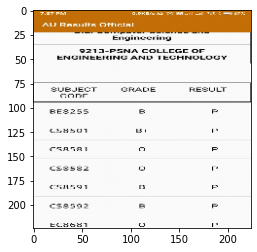

In [177]:
i=1
plt.imshow(Xtrain[i])
print(ytrain[i])

[1]


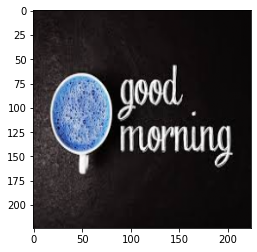

In [178]:
i=2
plt.imshow(Xtrain[i])
print(ytrain[i])

In [179]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [180]:
model.fit(Xtrain,ytrain,epochs=30)

Epoch 1/30
6/6 [==============================] - 2s 156ms/step - loss: 3.5777 - accuracy: 0.4811
Epoch 2/30
6/6 [==============================] - 1s 155ms/step - loss: 0.6892 - accuracy: 0.5568
Epoch 3/30
6/6 [==============================] - 1s 155ms/step - loss: 0.6847 - accuracy: 0.5514
Epoch 4/30
6/6 [==============================] - 1s 155ms/step - loss: 0.6823 - accuracy: 0.5568
Epoch 5/30
6/6 [==============================] - 1s 154ms/step - loss: 0.6786 - accuracy: 0.5568
Epoch 6/30
6/6 [==============================] - 1s 153ms/step - loss: 0.6702 - accuracy: 0.5568
Epoch 7/30
6/6 [==============================] - 1s 153ms/step - loss: 0.6674 - accuracy: 0.5568
Epoch 8/30
6/6 [==============================] - 1s 157ms/step - loss: 0.6651 - accuracy: 0.5838
Epoch 9/30
6/6 [==============================] - 1s 155ms/step - loss: 0.6457 - accuracy: 0.5838
Epoch 10/30
6/6 [==============================] - 1s 156ms/step - loss: 0.6322 - accuracy: 0.6162
Epoch 11/30
6/6 [==

In [181]:
yp=model.predict(Xtest)

In [182]:
YP=yp>0.5

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(ytest,YP)

0.7625

In [185]:
from sklearn.metrics import confusion_matrix

In [186]:
confusion_matrix(ytest,YP)

array([[31, 14],
       [ 5, 30]])

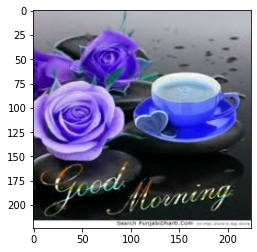

yes it is good morning wish
____________________________________________________________________________________________________


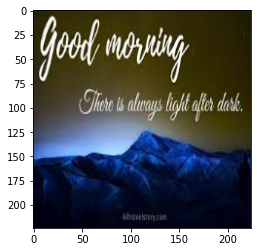

yes it is good morning wish
____________________________________________________________________________________________________


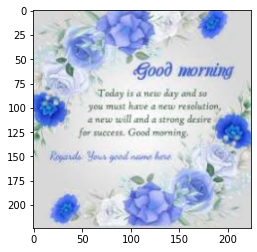

not a good morning wish
____________________________________________________________________________________________________


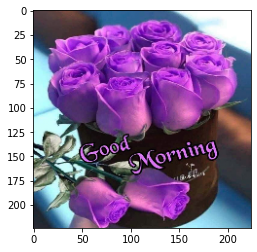

not a good morning wish
____________________________________________________________________________________________________


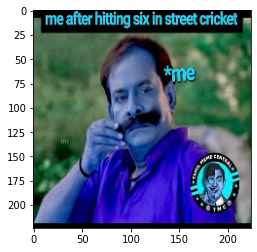

yes it is good morning wish
____________________________________________________________________________________________________


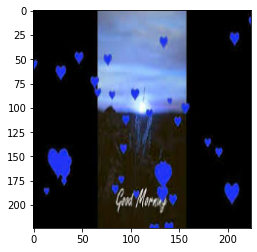

yes it is good morning wish
____________________________________________________________________________________________________


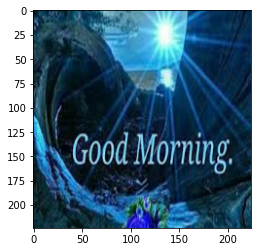

yes it is good morning wish
____________________________________________________________________________________________________


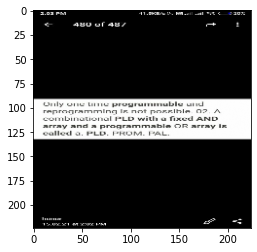

not a good morning wish
____________________________________________________________________________________________________


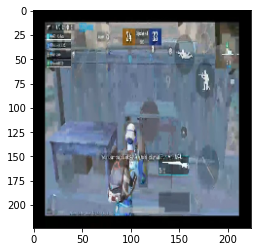

not a good morning wish
____________________________________________________________________________________________________


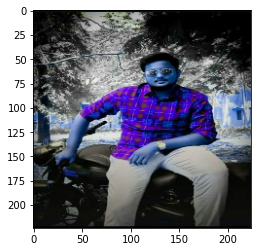

not a good morning wish
____________________________________________________________________________________________________


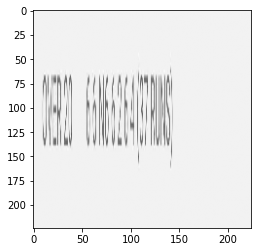

not a good morning wish
____________________________________________________________________________________________________


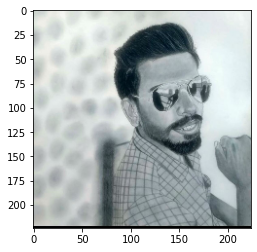

not a good morning wish
____________________________________________________________________________________________________


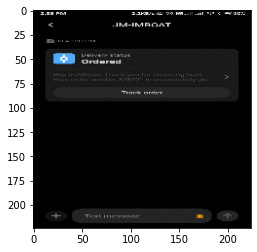

not a good morning wish
____________________________________________________________________________________________________


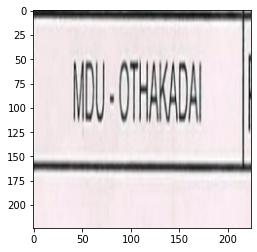

not a good morning wish
____________________________________________________________________________________________________


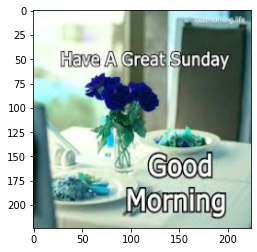

yes it is good morning wish
____________________________________________________________________________________________________


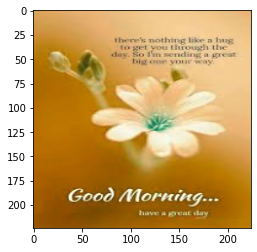

not a good morning wish
____________________________________________________________________________________________________


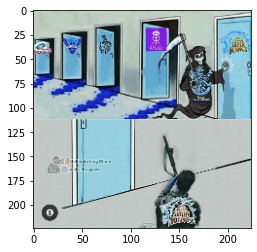

not a good morning wish
____________________________________________________________________________________________________


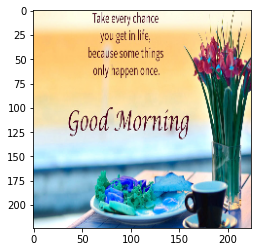

not a good morning wish
____________________________________________________________________________________________________


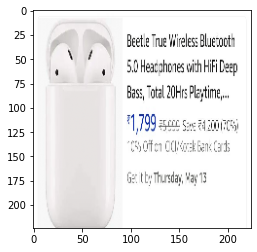

not a good morning wish
____________________________________________________________________________________________________


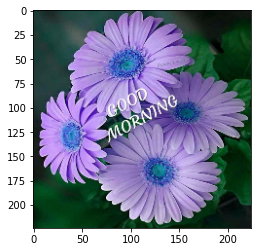

yes it is good morning wish
____________________________________________________________________________________________________


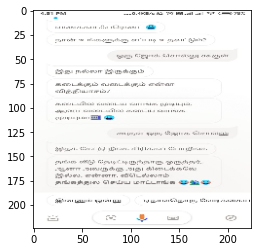

not a good morning wish
____________________________________________________________________________________________________


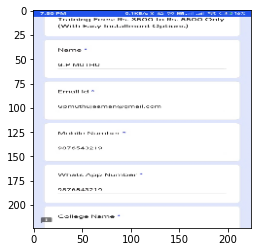

not a good morning wish
____________________________________________________________________________________________________


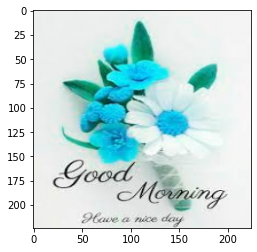

yes it is good morning wish
____________________________________________________________________________________________________


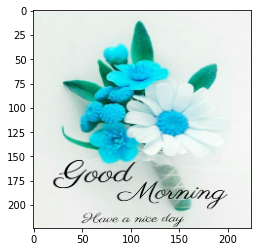

yes it is good morning wish
____________________________________________________________________________________________________


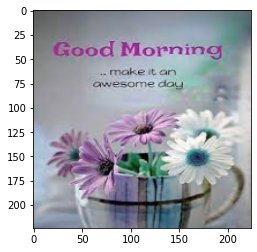

yes it is good morning wish
____________________________________________________________________________________________________


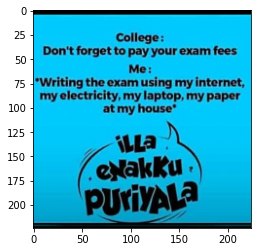

yes it is good morning wish
____________________________________________________________________________________________________


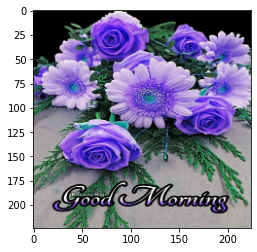

not a good morning wish
____________________________________________________________________________________________________


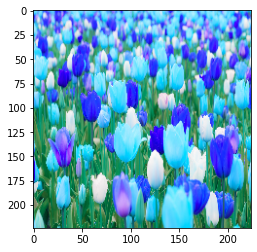

yes it is good morning wish
____________________________________________________________________________________________________


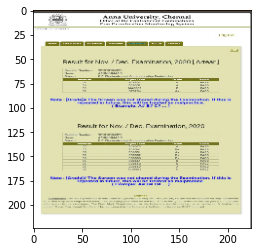

not a good morning wish
____________________________________________________________________________________________________


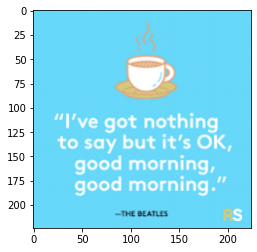

yes it is good morning wish
____________________________________________________________________________________________________


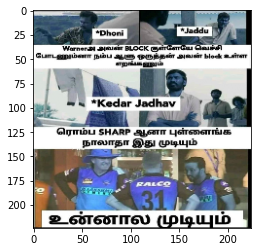

not a good morning wish
____________________________________________________________________________________________________


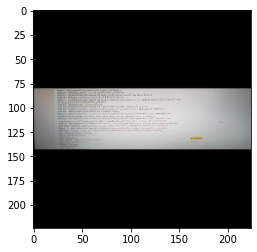

not a good morning wish
____________________________________________________________________________________________________


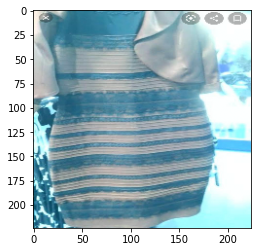

not a good morning wish
____________________________________________________________________________________________________


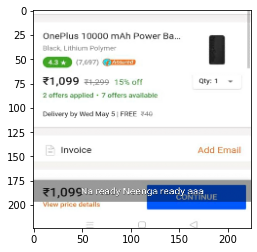

not a good morning wish
____________________________________________________________________________________________________


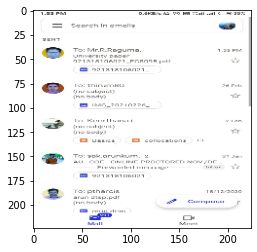

not a good morning wish
____________________________________________________________________________________________________


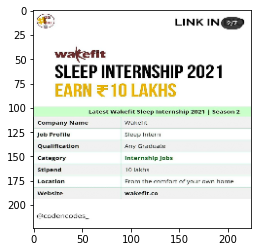

not a good morning wish
____________________________________________________________________________________________________


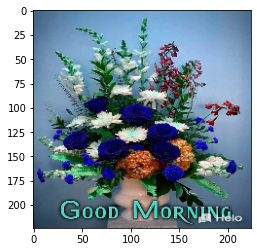

yes it is good morning wish
____________________________________________________________________________________________________


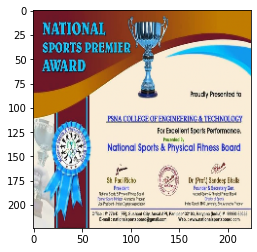

not a good morning wish
____________________________________________________________________________________________________


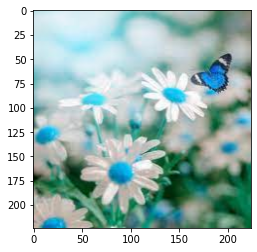

not a good morning wish
____________________________________________________________________________________________________


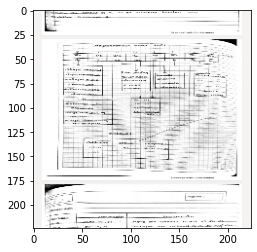

not a good morning wish
____________________________________________________________________________________________________


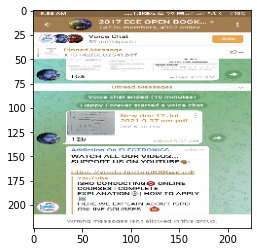

not a good morning wish
____________________________________________________________________________________________________


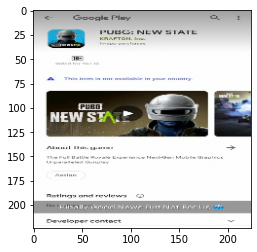

not a good morning wish
____________________________________________________________________________________________________


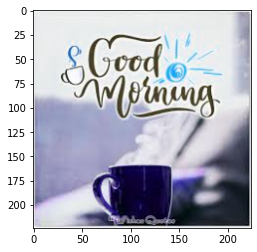

not a good morning wish
____________________________________________________________________________________________________


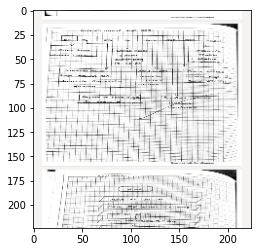

not a good morning wish
____________________________________________________________________________________________________


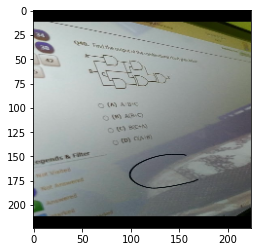

not a good morning wish
____________________________________________________________________________________________________


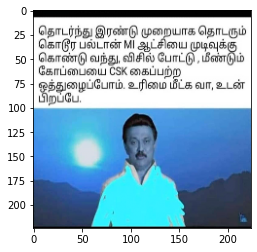

not a good morning wish
____________________________________________________________________________________________________


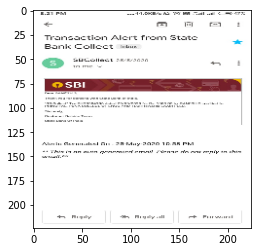

not a good morning wish
____________________________________________________________________________________________________


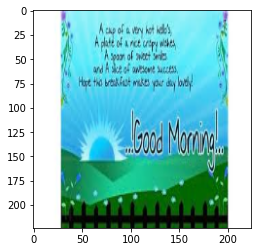

yes it is good morning wish
____________________________________________________________________________________________________


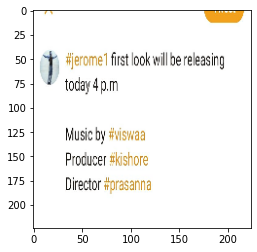

not a good morning wish
____________________________________________________________________________________________________


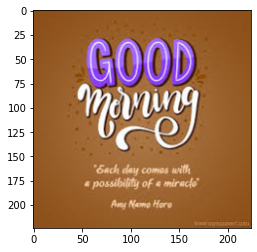

yes it is good morning wish
____________________________________________________________________________________________________


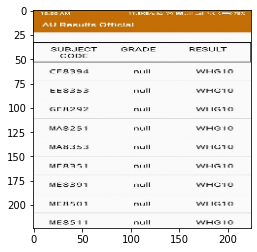

not a good morning wish
____________________________________________________________________________________________________


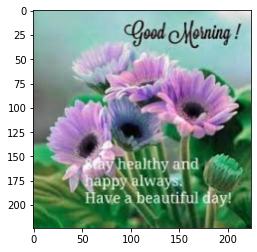

not a good morning wish
____________________________________________________________________________________________________


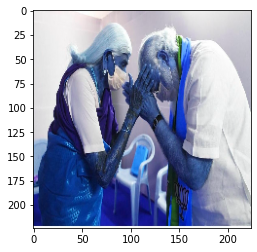

yes it is good morning wish
____________________________________________________________________________________________________


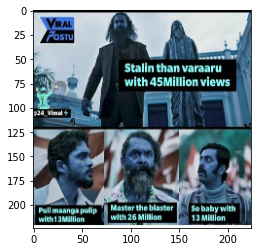

yes it is good morning wish
____________________________________________________________________________________________________


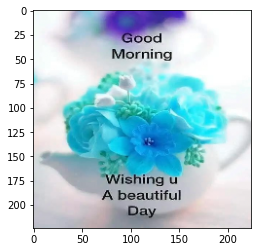

yes it is good morning wish
____________________________________________________________________________________________________


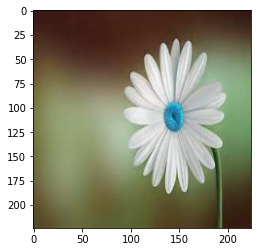

not a good morning wish
____________________________________________________________________________________________________


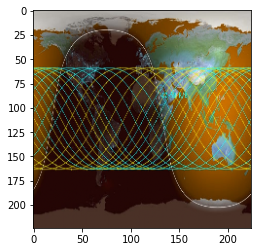

not a good morning wish
____________________________________________________________________________________________________


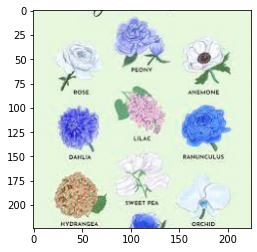

yes it is good morning wish
____________________________________________________________________________________________________


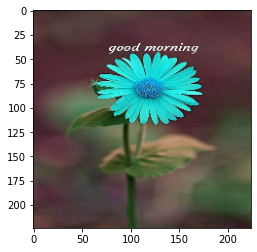

yes it is good morning wish
____________________________________________________________________________________________________


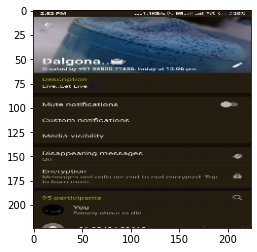

not a good morning wish
____________________________________________________________________________________________________


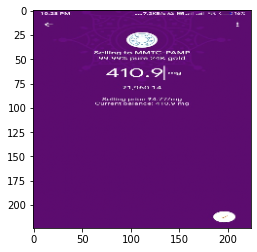

yes it is good morning wish
____________________________________________________________________________________________________


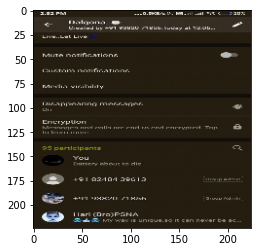

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


not a good morning wish
____________________________________________________________________________________________________


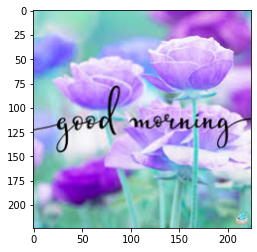

yes it is good morning wish
____________________________________________________________________________________________________


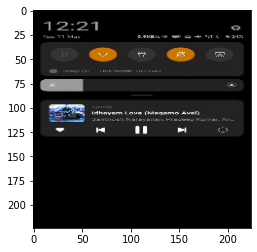

not a good morning wish
____________________________________________________________________________________________________


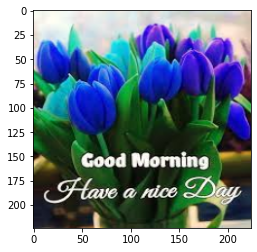

yes it is good morning wish
____________________________________________________________________________________________________


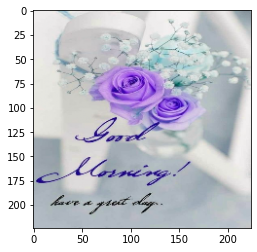

yes it is good morning wish
____________________________________________________________________________________________________


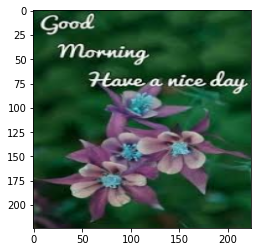

yes it is good morning wish
____________________________________________________________________________________________________


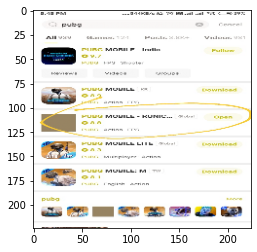

not a good morning wish
____________________________________________________________________________________________________


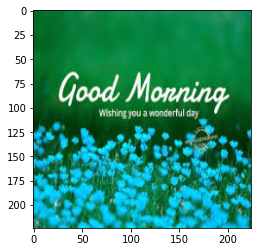

yes it is good morning wish
____________________________________________________________________________________________________


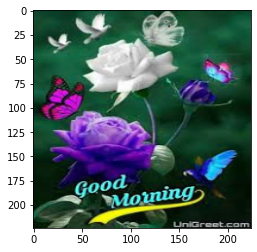

yes it is good morning wish
____________________________________________________________________________________________________


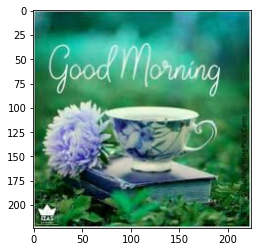

yes it is good morning wish
____________________________________________________________________________________________________


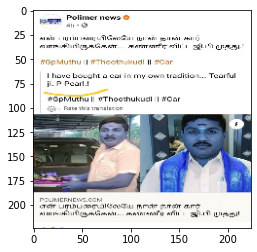

not a good morning wish
____________________________________________________________________________________________________


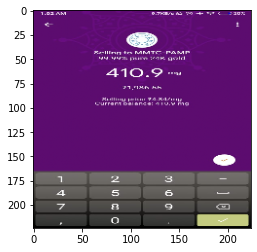

not a good morning wish
____________________________________________________________________________________________________


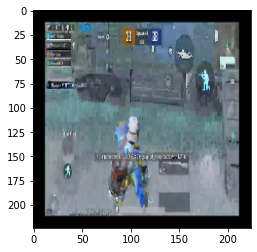

not a good morning wish
____________________________________________________________________________________________________


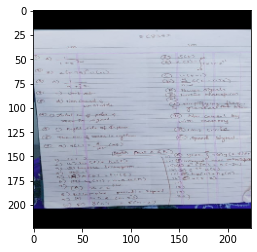

not a good morning wish
____________________________________________________________________________________________________


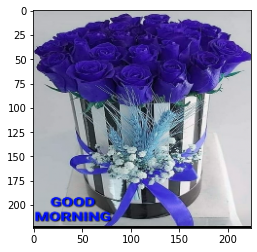

yes it is good morning wish
____________________________________________________________________________________________________


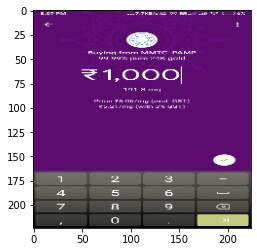

not a good morning wish
____________________________________________________________________________________________________


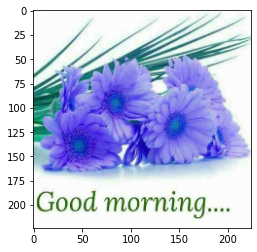

yes it is good morning wish
____________________________________________________________________________________________________


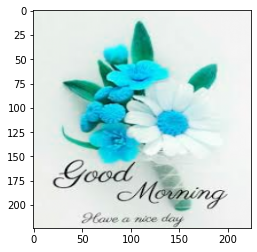

yes it is good morning wish
____________________________________________________________________________________________________


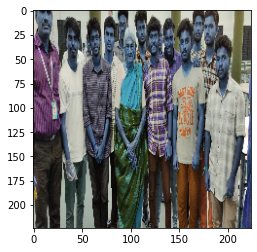

not a good morning wish
____________________________________________________________________________________________________


In [133]:
for i in range(len(Xtest)):
  plt.imshow(Xtest[i])
  plt.show()
  print(["yes it is good morning wish" if YP[i]==1 else "not a good morning wish"][0])
  print("_"*100)
